<a href="https://colab.research.google.com/github/janjuatest/Titanic-Dataset/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the data manipulation/visualization libraries needed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the titanic dataset


In [ ]:
df=pd.read_csv('titanic_train.csv')

Check the dataframe information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check data frame for missing elements N/A values

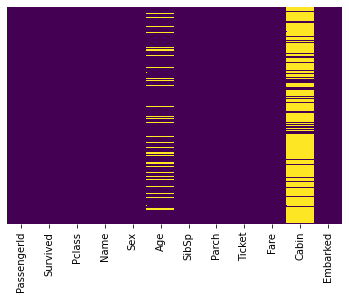

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

As can be seen above Cabin column has a lot of missing data. We can count the exact elements missing as follows

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can drop the Cabin columns since its mostly empty

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Lets look at the target column i.e. 'Survived'. This is what we are trying to predict

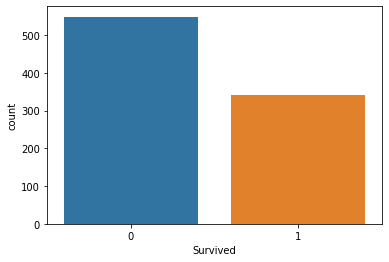

In [ ]:
sns.countplot(data=df,x='Survived')

Data is unbalanced but usable

Lets do some more EDA

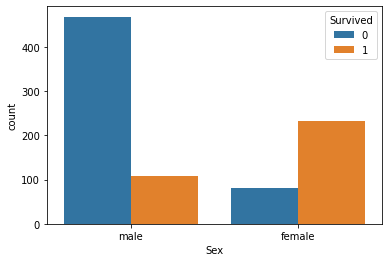

In [ ]:
sns.countplot(x='Sex',data=df,hue='Survived')

As can be seen above there is clearly a higher survival rate for female passengers


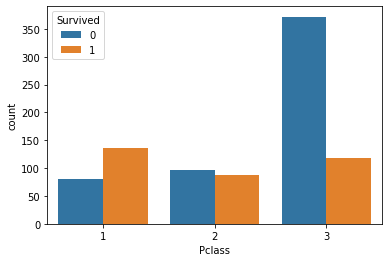

In [ ]:
sns.countplot(x='Pclass',data=df,hue='Survived')

As can be seen above there is a lower survival rate for passengers from Class 3. These are important columns for machine learning algorithm

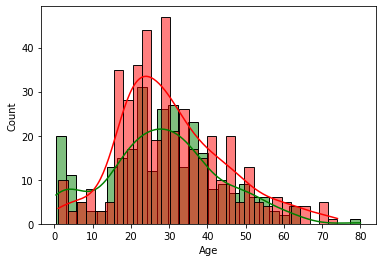

In [ ]:
sns.histplot(df[df['Survived']==1]['Age'],bins=30,color='green',kde=True)
sns.histplot(df[df['Survived']==0]['Age'],bins=30,color='red',kde=True)

As can be seen above, age also has an impact. Notice the double bump for infants in passengers survived

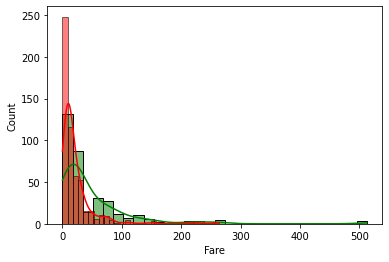

In [ ]:
sns.histplot(df[df['Survived']==1]['Fare'],bins=30,color='green',kde=True)
sns.histplot(df[df['Survived']==0]['Fare'],bins=30,color='red',kde=True)

Not much effect of Fares on Survival

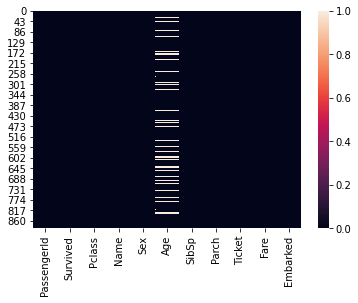

In [ ]:
sns.heatmap(df.isnull())

Age column has some missing data

In [ ]:
print(df[df['Pclass']==1]['Age'].mean())
print(df[df['Pclass']==2]['Age'].mean())
print(df[df['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


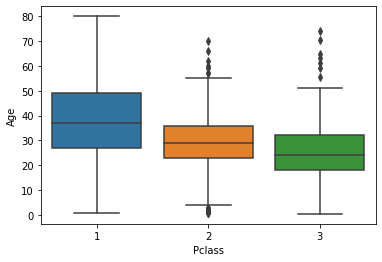

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=df)

Age and Passenger Class has some correlation

Lets fill the Nulls in Age column with average values for each passenger class

In [ ]:
cd=df[['Age','Pclass']]

In [ ]:
cd

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


Function to replace NaN values in Age column with average age of Passegnger Class

In [ ]:
def fillage(pair):
    Age=pair[0]
    Class=pair[1]
    
    if pd.isnull(Age):
        if Class==1:
            return 38
        elif Class==2:
            return 30
        else:
            return 25
    else:
        return Age

Replace Nan with mean age

In [ ]:
df['Age']=df[['Age','Pclass']].apply(fillage,axis=1)

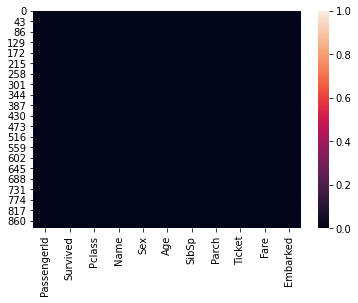

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All nulls have been replaced or dropped now

Now lets look at the the columns

Lets convert sex column into boolean

In [ ]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Sex_male'],
      dtype='object')

Sex column has now been converted into a Boolean

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Lets now look at the Embarked column. It has three different values. Lets also convert them into boolean columns

In [ ]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
CA 2144     6
           ..
349247      1
350046      1
244373      1
113794      1
3101298     1
Name: Ticket, Length: 680, dtype: int64

The Ticket and Name columns dont have any important categories so can be dropped

In [ ]:
df.drop(['Ticket','Name'],axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
df.drop('PassengerId',axis=1,inplace=True)

Passenger Id is also just an index

In [ ]:
len (df)

889

We started with a total of 891 data points so this is good retention

In [ ]:
y=df['Survived']


y is the Target/Output column

In [ ]:
X=df.drop('Survived',axis=1)

X is now the input with all relevant data columns except the output column

In [ ]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

Lets now try Logistic Regression from Sci Kit Learn Machine Learning Algorithms

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Seperate data into a training set and a test set
Test set has 25% of data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Instantiate Model and then Fit it usind the train data

In [ ]:
predictions=logmodel.predict(X_test)

Import the metrics for measuring the results

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



NOT BAD! We have reached 83% accuracy with Logistic Regression

In [ ]:
confusion_matrix(y_test,predictions)

array([[126,  10],
       [ 27,  60]])

WE have 10 Type 1 (False Positive) and 27 Type 2 errors(False negative)

array([[147,  16],
       [ 30,  74]], dtype=int64)

Now lets try Support Vector Machines for Binary Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
mySVCmodel=SVC(gamma='auto',C=10)

In [ ]:
mySVCmodel.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictionsSVC=mySVCmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictionsSVC))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       136
           1       0.61      0.63      0.62        87

    accuracy                           0.70       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.70      0.70      0.70       223



SVC doesnt perform very well and we need to optimize the C and gamma parameters

In [ ]:
print(confusion_matrix(y_test,predictionsSVC))

[[101  35]
 [ 32  55]]


In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV is the best model to optimize the hyper parameters

In [ ]:
paramgrid={'C':[0.1,1,100,1000],'gamma':[0.001,0.01,.1,10],'kernel':['linear','rbf','sigmoid']}

Make a grid of parameters to find the best one

In [ ]:
gridSVC=GridSearchCV(mySVCmodel,paramgrid,verbose=2,cv=5)

Use SK Learn's Grid Search CV. An awesome tool to optimize the hyperparameters of the model like C, gamma and kernel in SVC above


In [ ]:
gridSVC.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.1, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 55.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=10, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

GridSearchCV using Cross validation to find the best hyper parameters
This may take sometime


In [ ]:
gridSVC.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
predictionsGrid=gridSVC.predict(X_test)

Predictions made using the best hyper parameters

In [ ]:
print(classification_report(y_test,predictionsGrid))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       136
           1       0.81      0.66      0.73        87

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



So we can get upto 80% accuracy using SVC
In this case SVC was worse than Logistic Regression 



In [ ]:
from sklearn.preprocessing import MinMaxScaler
myScaler=MinMaxScaler()
X_trainS=myScaler.fit_transform(X_train).values()
X_testS=myScaler.transform(X_test).values()
y_trainS=y_train.values()
y_testS=y_test.values()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [ ]:
myTFmodel=Sequential([
    Dense(8,activation='relu'),
    Dropout(0.2)
    Dense(4,activation='relu'),
    Dropout(0.2)
    Dense(2,activation='relu'),
    Dropout(0.2)
    Dense(1,activation='sigmoid')
])


In [ ]:
myTFmodel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc']')

In [ ]:
history=myTFmodel.fit(X_trainS,y_trainS,epochs=100,verbose=2,validation_data=(X_testS,y_testS))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
